### Install the required packages and load the data from uciml repository

In [1]:
# Install the ucimlrepo package
# pip install pandas certifi
# pip install ucimlrep

# Import the dataset into your code
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


# Check if the dataset is loaded
if cdc_diabetes_health_indicators is None: 
    print("Failed to fetch dataset.") 
else: 
    print("Dataset fetched successfully.")

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### Exploratory Data Analysis

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert features to DataFrame
if hasattr(cdc_diabetes_health_indicators.data, 'features'):
    df_features = pd.DataFrame(cdc_diabetes_health_indicators.data.features)
else:
    print("Data features attribute not found.")

# Convert targets to DataFrame
if hasattr(cdc_diabetes_health_indicators.data, 'targets'):
    df_targets = pd.DataFrame(cdc_diabetes_health_indicators.data.targets)
else:
    print("Data targets attribute not found.")

# Combine features and targets into a single DataFrame if needed
df = pd.concat([df_features, df_targets], axis=1)

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

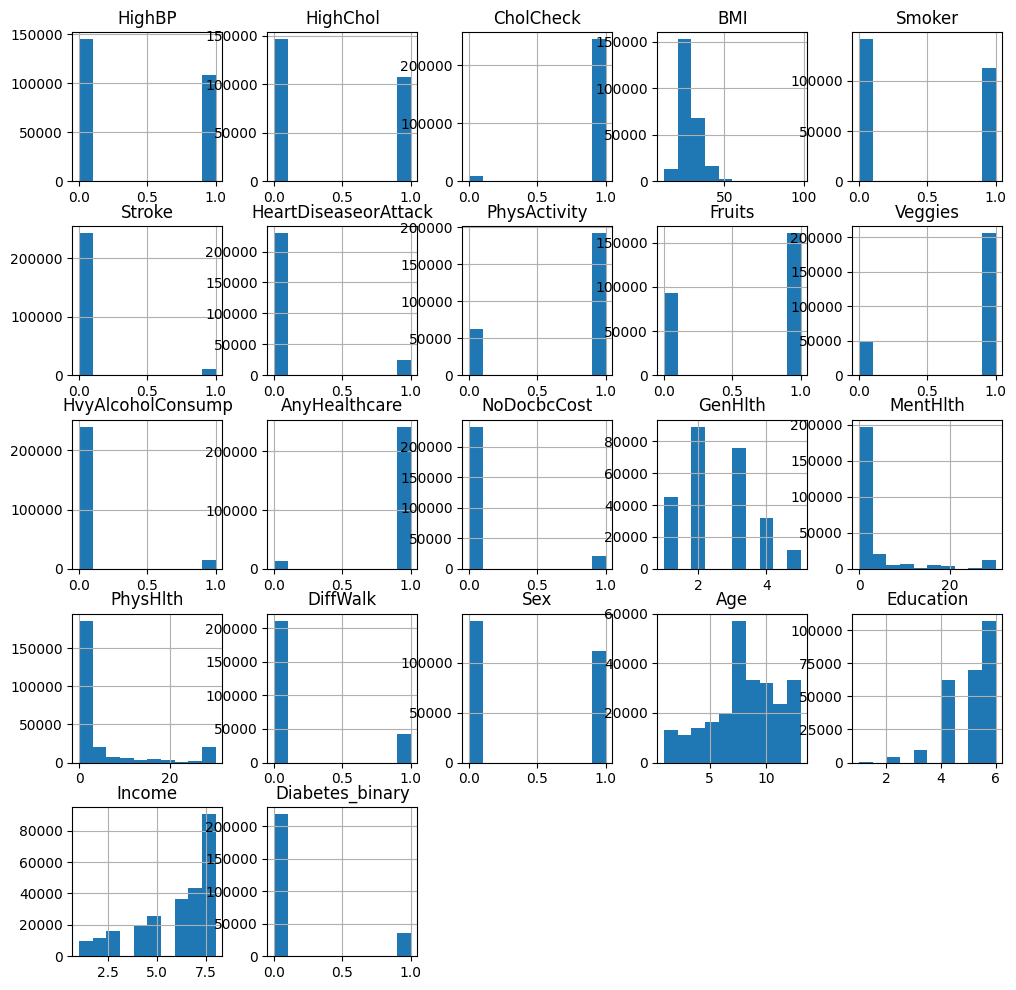

In [3]:
# Plot histograms for all variables 
df.hist(figsize=(12, 12))

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Diabetes_binary', 'GenHlth_2',
       'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_2', 'Age_3', 'Age_4',
       'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11',
       'Age_12', 'Age_13', 'Education_2', 'Education_3', 'Education_4',
       'Education_5', 'Education_6', 'Income_2', 'Income_3', 'Income_4',
       'Income_5', 'Income_6', 'Income_7', 'Income_8'],
      dtype='object')
                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.298199   0.098508  0.213748  0.096991   
HighChol              0.298199  1.000000   0.085642  0.106722  0.091299   
CholCheck             0.098508  0.085642   1.000000  0.034495 -0.009929   
BMI                   0.213748  0.106722   0.034495  

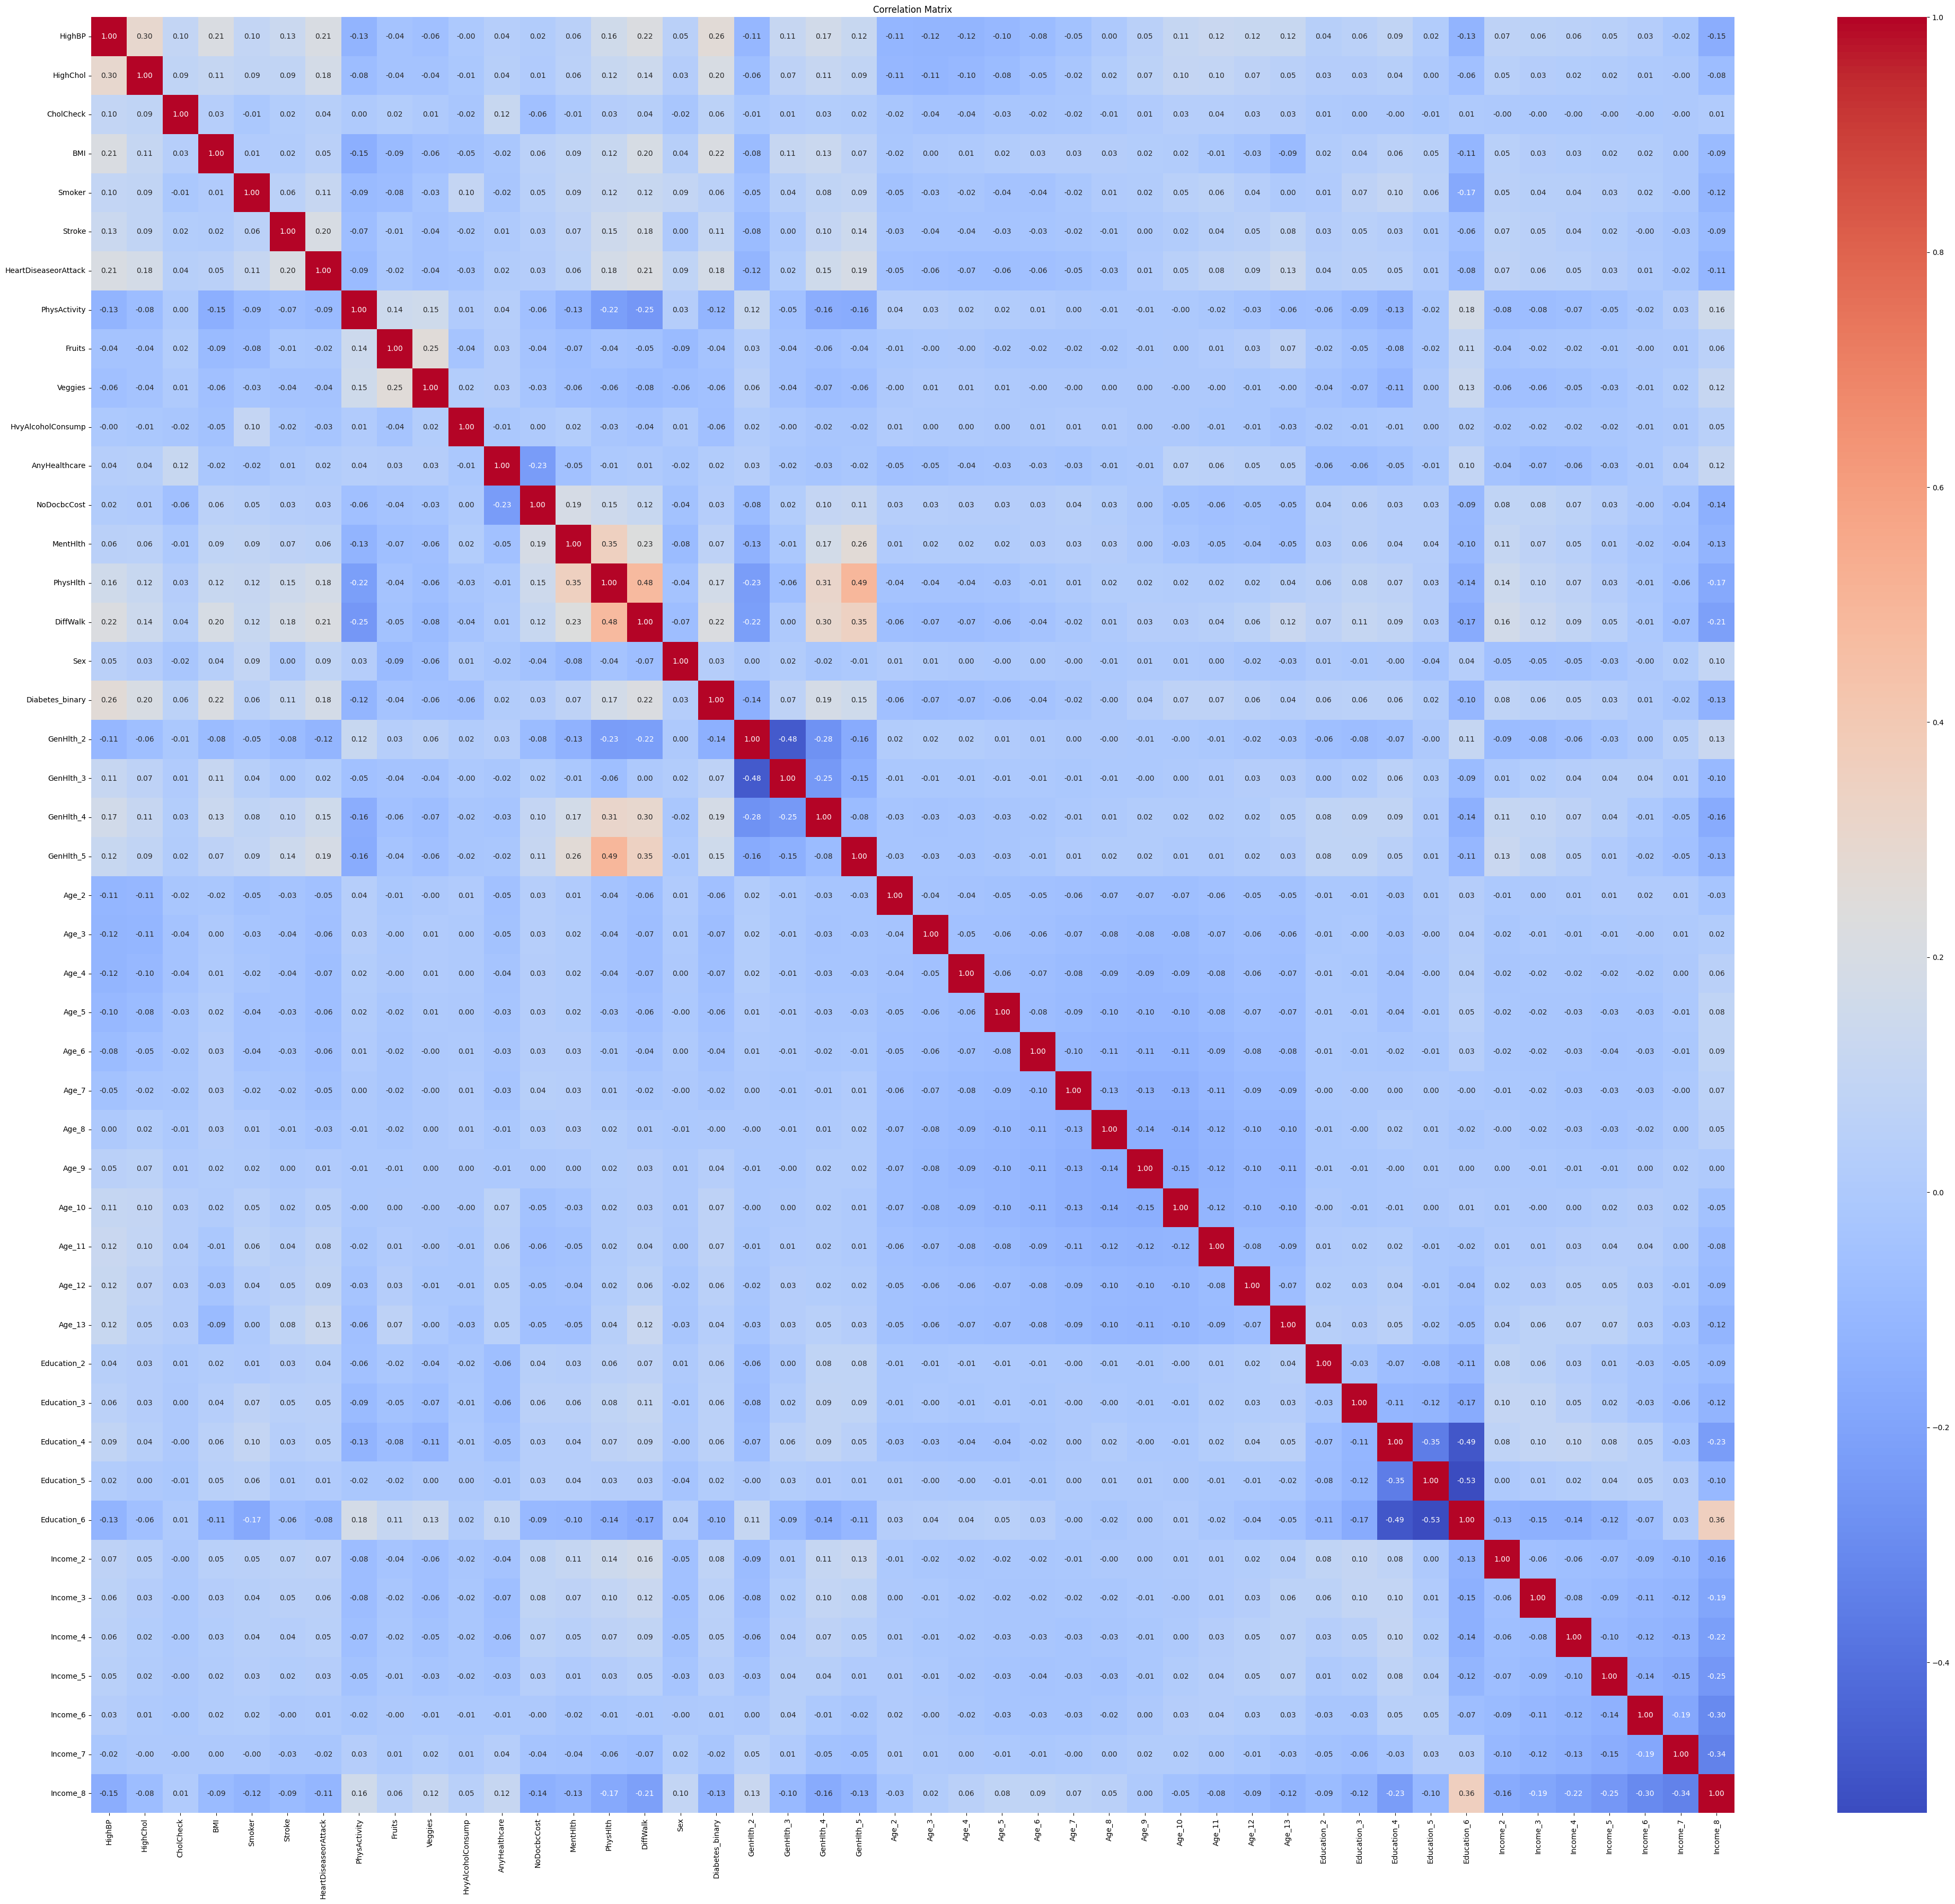

In [4]:
df = pd.get_dummies(df, columns=['GenHlth', 'Age', 'Education','Income'], drop_first = True)
print(df.columns)

# Correlation matrix
correlation_matrix = df.corr() 
print(correlation_matrix)

# Plot correlation matrix as a heatmap (all columns)
plt.figure(figsize=(50, 44))  # Adjust figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

c:\Users\tienn\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\tienn\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


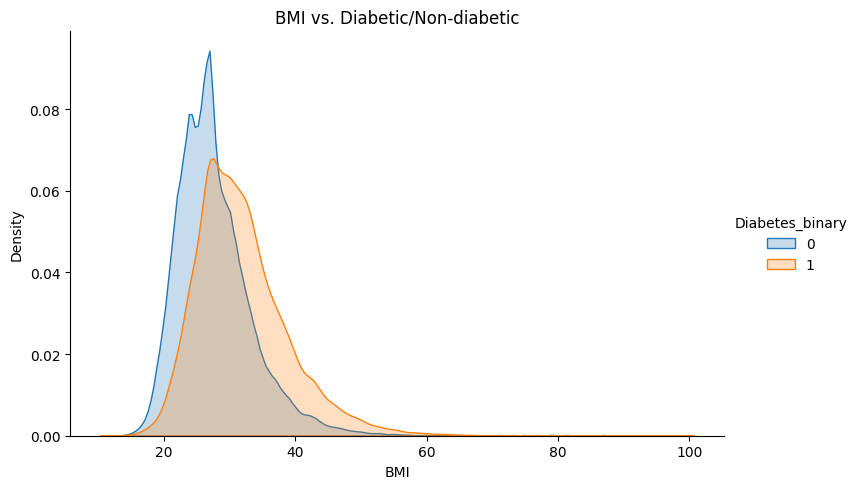

In [5]:
g = sns.FacetGrid(df[df['BMI'].notnull()], hue='Diabetes_binary', height=5, aspect=1.5).set(title = 'BMI vs. Diabetic/Non-diabetic')
g.map(sns.kdeplot, 'BMI', shade=True)
g.add_legend()

In [6]:
## Under-sampling - Reduce the number of non-diabetic samples to balance the dataset. This can be done by randomly selecting a subset of the majority class.
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Diabetes_binary'] == 0]
df_minority = df[df['Diabetes_binary'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
print(df_downsampled['Diabetes_binary'].value_counts())


Diabetes_binary
1    35346
0    35346
Name: count, dtype: int64


### Model 1 - Logistic Regression

In [7]:
### Adding an intercept for logistic regression 
df_downsampled['intercept'] = 1.0

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant

mod1 = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'GenHlth_2',
       'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_2', 'Age_3', 'Age_4',
       'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11',
       'Age_12', 'Age_13', 'Income_2', 'Income_3', 'Income_4',
       'Income_5', 'Income_6', 'Income_7', 'Income_8','intercept']

y = df_downsampled['Diabetes_binary']
X = df_downsampled[mod1]

# Convert boolean columns to integers 
bool_columns = X.select_dtypes(include=['bool']).columns 
X[bool_columns] = X[bool_columns].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)
model1 = sm.Logit(y_train, X_train).fit()
print(model1.summary())

# Predictions on test set
y_test_pred = model1.predict(X_test)
X_test.loc[:, 'prediction'] = 0
X_test.loc[y_test_pred > 0.5, 'prediction'] = 1
 
# Compute training errors
train_accuracy = accuracy_score(y_train, model1.predict(X_train).round())
train_precision = precision_score(y_train, model1.predict(X_train).round())
train_recall = recall_score(y_train, model1.predict(X_train).round())
train_f1 = f1_score(y_train, model1.predict(X_train).round())
 
# Compute test errors
test_accuracy = accuracy_score(y_test, X_test['prediction'])
test_precision = precision_score(y_test, X_test['prediction'])
test_recall = recall_score(y_test, X_test['prediction'])
test_f1 = f1_score(y_test, X_test['prediction'])
 
# Print training and test errors
print("Training Accuracy: {:.2%}".format(train_accuracy))
print("Training Precision: {:.2%}".format(train_precision))
print("Training Recall: {:.2%}".format(train_recall))
print("Training F1 Score: {:.2%}".format(train_f1))
 
print("\nTest Accuracy: {:.2%}".format(test_accuracy))
print("Test Precision: {:.2%}".format(test_precision))
print("Test Recall: {:.2%}".format(test_recall))
print("Test F1 Score: {:.2%}".format(test_f1))

C:\Users\tienn\AppData\Local\Temp\ipykernel_34896\420482909.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bool_columns] = X[bool_columns].astype(int)


Optimization terminated successfully.
         Current function value: 0.515391
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                53019
Model:                          Logit   Df Residuals:                    52984
Method:                           MLE   Df Model:                           34
Date:                Sat, 28 Dec 2024   Pseudo R-squ.:                  0.2564
Time:                        18:04:45   Log-Likelihood:                -27325.
converged:                       True   LL-Null:                       -36750.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighBP                   0.7248      0.023     31.900      0.000       0.680       0.769

### Model 2 - Decision Tree

In [8]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

mod2 = mod1

y = df_downsampled['Diabetes_binary']
X = df_downsampled[mod2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7, max_features=None, max_leaf_nodes=15, 
                                  min_samples_leaf=8, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                  random_state=109, splitter='best')
clf = clf.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Compute training errors
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Compute test errors
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print training and test errors
print("Training Accuracy: {:.2%}".format(train_accuracy))
print("Training Precision: {:.2%}".format(train_precision))
print("Training Recall: {:.2%}".format(train_recall))
print("Training F1 Score: {:.2%}".format(train_f1))

print("\nTest Accuracy: {:.2%}".format(test_accuracy))
print("Test Precision: {:.2%}".format(test_precision))
print("Test Recall: {:.2%}".format(test_recall))
print("Test F1 Score: {:.2%}".format(test_f1))

# Export estimated tree into dot graphic file
dot_data = tree.export_graphviz(clf, out_file='Dtree.dot',
feature_names=X.columns)


Training Accuracy: 71.34%
Training Precision: 68.76%
Training Recall: 78.27%
Training F1 Score: 73.21%

Test Accuracy: 70.98%
Test Precision: 68.39%
Test Recall: 77.87%
Test F1 Score: 72.82%


### Model 3 - Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

mod3 = mod2

y = df_downsampled['Diabetes_binary']
X = df_downsampled[mod3]

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=109, n_estimators=100, max_depth=15)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Compute training errors
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
train_precision_rf = precision_score(y_train, rf_model.predict(X_train))
train_recall_rf = recall_score(y_train, rf_model.predict(X_train))
train_f1_rf = f1_score(y_train, rf_model.predict(X_train))

# Compute test errors
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Print training and test errors
print("Random Forest Training Accuracy: {:.2%}".format(train_accuracy_rf))
print("Random Forest Training Precision: {:.2%}".format(train_precision_rf))
print("Random Forest Training Recall: {:.2%}".format(train_recall_rf))
print("Random Forest Training F1 Score: {:.2%}".format(train_f1_rf))

print("\nRandom Forest Test Accuracy: {:.2%}".format(test_accuracy_rf))
print("Random Forest Test Precision: {:.2%}".format(test_precision_rf))
print("Random Forest Test Recall: {:.2%}".format(test_recall_rf))
print("Random Forest Test F1 Score: {:.2%}".format(test_f1_rf))

Random Forest Training Accuracy: 81.67%
Random Forest Training Precision: 79.86%
Random Forest Training Recall: 84.71%
Random Forest Training F1 Score: 82.21%

Random Forest Test Accuracy: 74.29%
Random Forest Test Precision: 72.55%
Random Forest Test Recall: 78.03%
Random Forest Test F1 Score: 75.19%


### Model 4 - XGBoost

In [10]:
from xgboost import XGBClassifier

mod4 = mod3

y = df_downsampled['Diabetes_binary']
X = df_downsampled[mod4]

# Train an XGBoost classifier
xgb_model = XGBClassifier(random_state=109, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_test_pred_xgb = xgb_model.predict(X_test)

# Compute training errors
train_accuracy_xgb = accuracy_score(y_train, xgb_model.predict(X_train))
train_precision_xgb = precision_score(y_train, xgb_model.predict(X_train))
train_recall_xgb = recall_score(y_train, xgb_model.predict(X_train))
train_f1_xgb = f1_score(y_train, xgb_model.predict(X_train))

# Compute test errors
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_precision_xgb = precision_score(y_test, y_test_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

# Print training and test errors
print("XGBoost Training Accuracy: {:.2%}".format(train_accuracy_xgb))
print("XGBoost Training Precision: {:.2%}".format(train_precision_xgb))
print("XGBoost Training Recall: {:.2%}".format(train_recall_xgb))
print("XGBoost Training F1 Score: {:.2%}".format(train_f1_xgb))

print("\nXGBoost Test Accuracy: {:.2%}".format(test_accuracy_xgb))
print("XGBoost Test Precision: {:.2%}".format(test_precision_xgb))
print("XGBoost Test Recall: {:.2%}".format(test_recall_xgb))
print("XGBoost Test F1 Score: {:.2%}".format(test_f1_xgb))


c:\Users\tienn\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Accuracy: 78.19%
XGBoost Training Precision: 76.18%
XGBoost Training Recall: 82.06%
XGBoost Training F1 Score: 79.01%

XGBoost Test Accuracy: 74.36%
XGBoost Test Precision: 72.57%
XGBoost Test Recall: 78.21%
XGBoost Test F1 Score: 75.29%


### Anomaly Detection: Detecting unusual health profiles that may signal potential outliers or unique cases using Isolation Forest

Number of anomalies detected: 3535


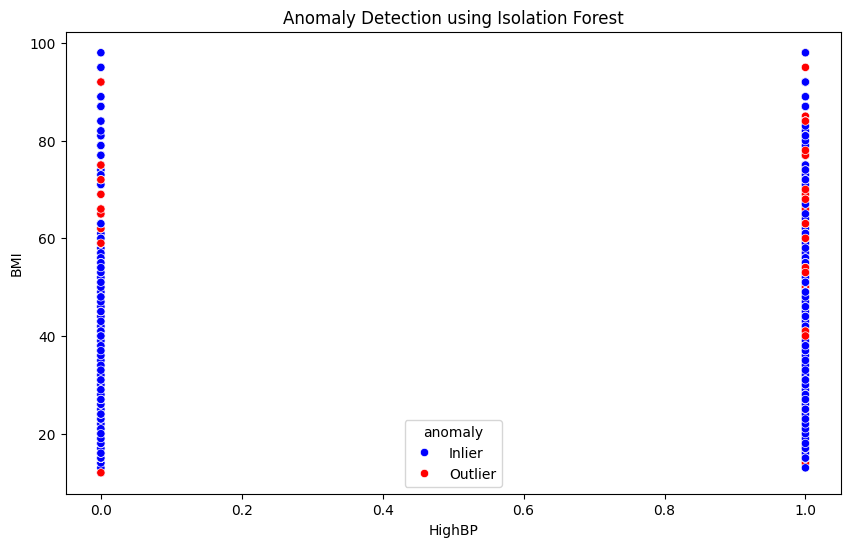

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Example: Assuming `df` is your health dataset with numerical features

mod5 = mod4
X = df_downsampled[mod5]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,          # Number of trees
    max_samples='auto',        # Use all samples or a subset
    contamination=0.05,        # Proportion of outliers in the dataset
    random_state=42,           # For reproducibility
)

# Fit the model to the scaled data
iso_forest.fit(X_scaled)

# Predict anomalies
df_downsampled['anomaly'] = iso_forest.predict(X_scaled)

# Separate outliers and inliers
outliers = df_downsampled[df_downsampled['anomaly'] == -1]
inliers = df_downsampled[df_downsampled['anomaly'] == 1]

print(f"Number of anomalies detected: {len(outliers)}")

# Example: Plot two features with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['HighBP'],
    y=df['BMI'],
    hue=df_downsampled['anomaly'].map({1: 'Inlier', -1: 'Outlier'}),
    palette=['blue', 'red']
)
plt.title("Anomaly Detection using Isolation Forest")
plt.show()


